In [1]:
import itertools
from datetime import date
from enum import Enum

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy import stats

import network
from network import Weight
from preprocess_data import *

In [2]:
def regular_networks():
    for game, venue, (situation, pp) in itertools.product(GAMES, [Venue.HOME, Venue.AWAY], [(Situation.REGULAR, None)]):
        res = build_networks(Game(game), venue=venue, situation=situation, pp=pp)
        if res is not None:
            nw = network.process_graph_for_analysis(res["position_pass_network"], make_undirected=True)
            ev_centr = network.eigenvector_centrality(nw)
            yield ev_centr

In [3]:
def power_play_networks():
    for game, venue, pp in itertools.product(
        GAMES, [Venue.HOME, Venue.AWAY], list(map(PowerPlay, range(1, MAX_PENALTY_NUMBER + 1)))
    ):
        res = build_networks(Game(game), venue=venue, situation=Situation.POWER_PLAY, pp=pp)
        if res is not None:
            nw = network.process_graph_for_analysis(res["position_pass_network"], make_undirected=True)
            if len(nw.nodes) == 5:
                ev_centr = network.eigenvector_centrality(nw)
                yield ev_centr

In [4]:
positions = ["Left Defense", "Right Defense", "Left Wing", "Center", "Right Wing"]

AttributeError: module 'src.network' has no attribute 'process_graph_for_analysis'

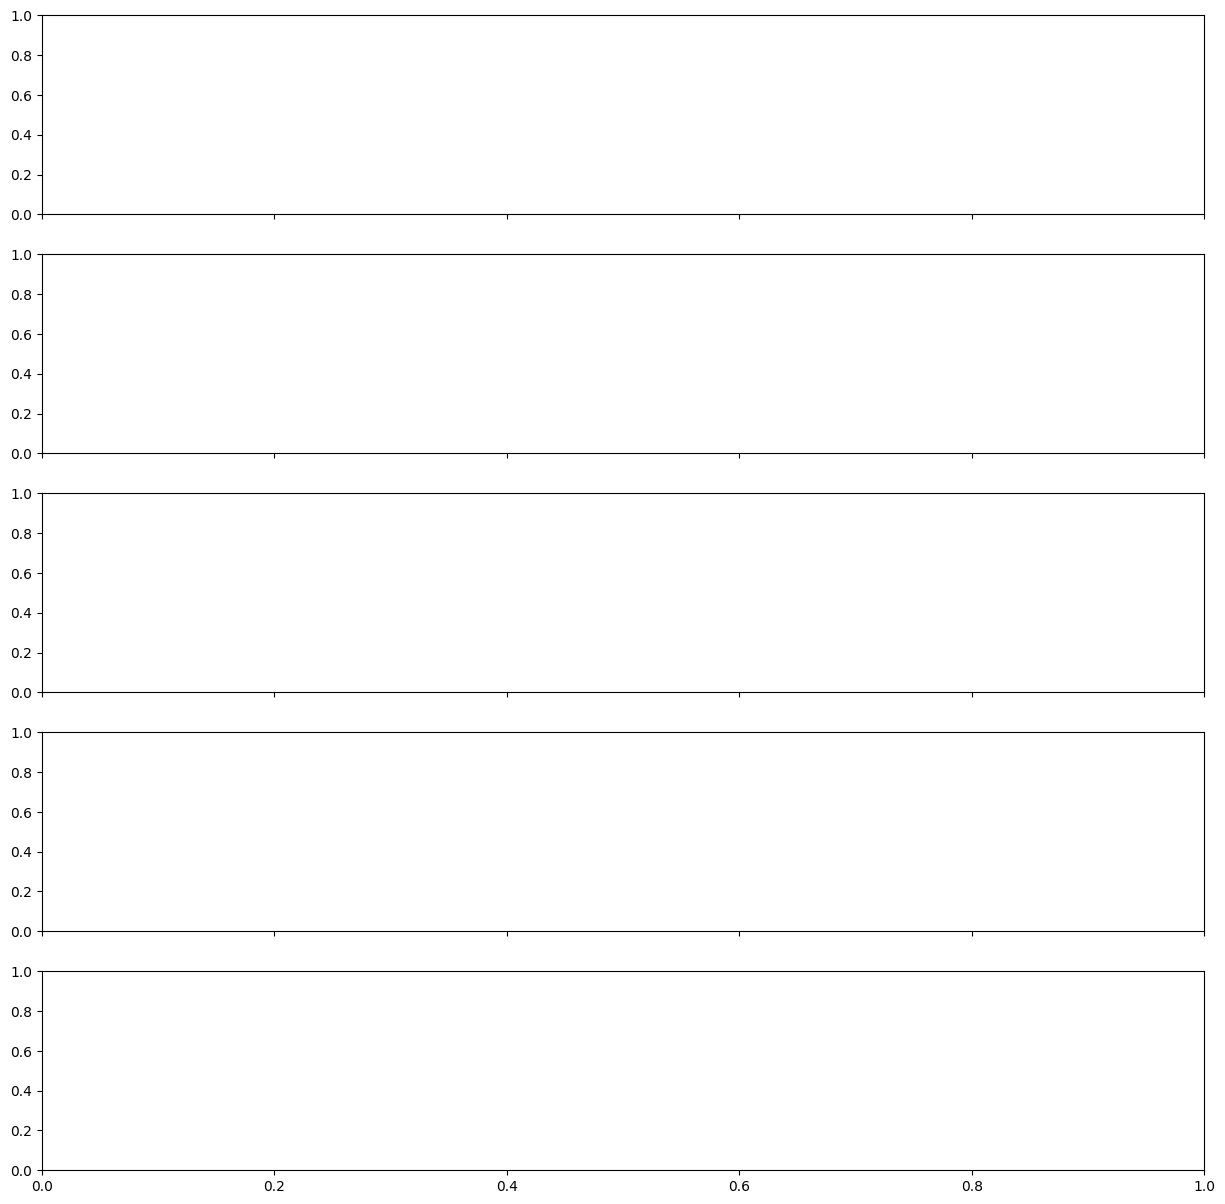

In [5]:
# Regular Networks: Eigenvector centrality
regular_centralities = dict((pos, []) for pos in positions)

fig, axs = plt.subplots(5, 1, sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(15)

for position, ax in zip(positions, axs):
    x = [stats[position] for stats in regular_networks()]
    regular_centralities[position] = x
    n, bins, patches = ax.hist(x, facecolor="blue", alpha=0.5, weights=np.ones_like(x) / len(x))
    ax.set_title(position)

plt.show()

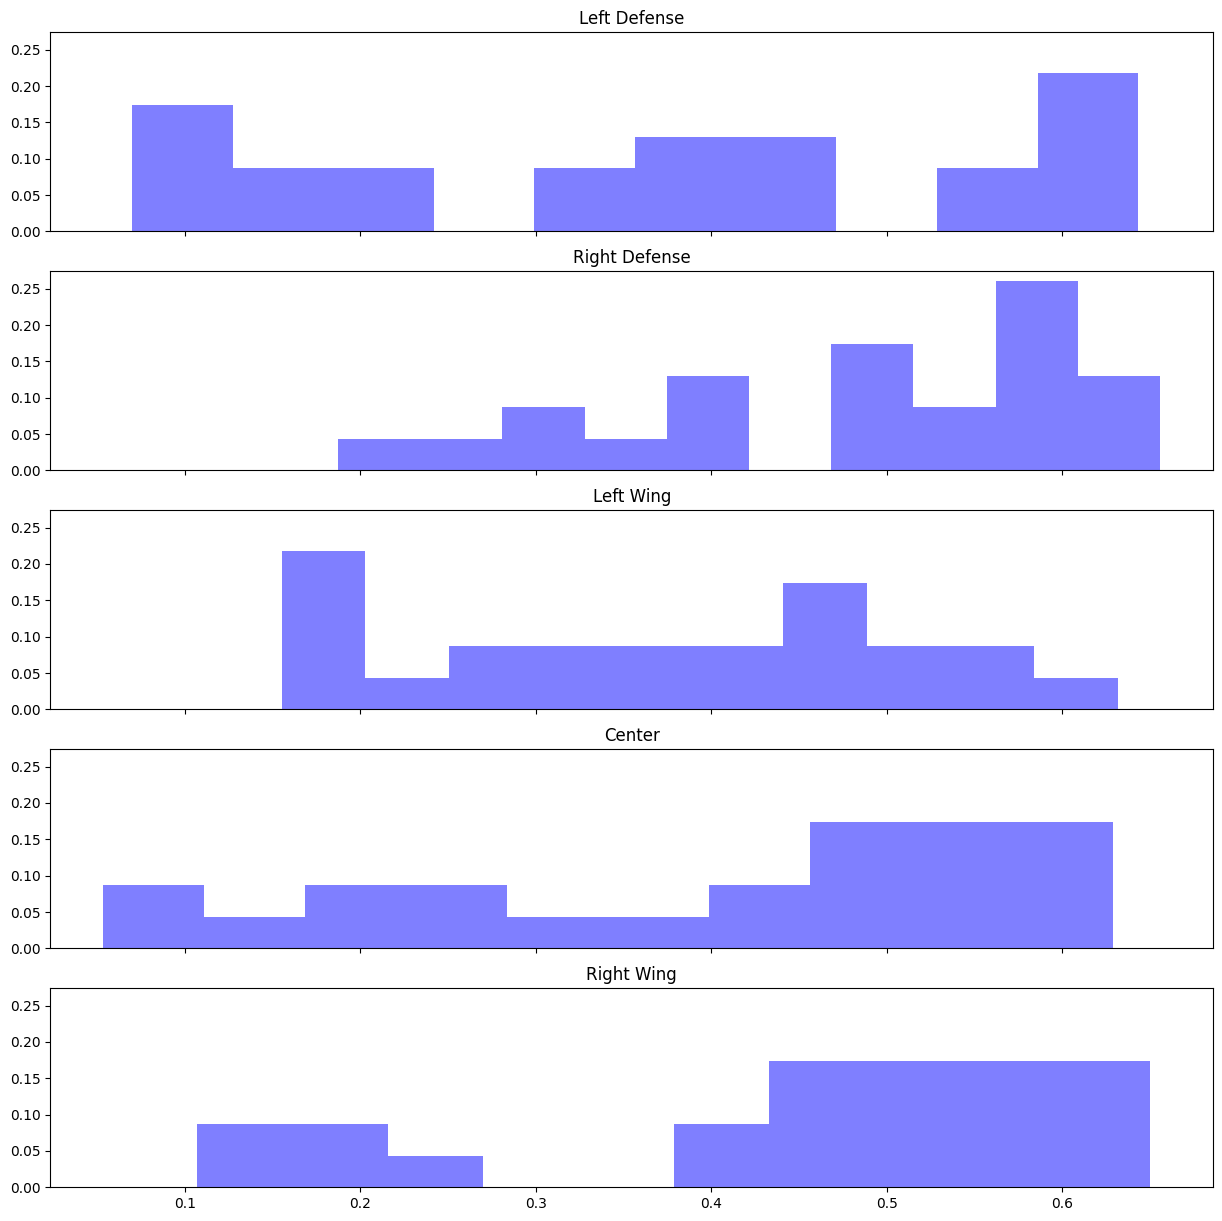

In [ ]:
# Power Play Networks: Eigenvector centrality
pp_centralities = dict((pos, []) for pos in positions)

fig, axs = plt.subplots(5, 1, sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(15)

for position, ax in zip(positions, axs):
    x = [stats[position] for stats in power_play_networks()]
    pp_centralities[position] = x
    n, bins, patches = ax.hist(x, facecolor="blue", alpha=0.5, weights=np.ones_like(x) / len(x))
    ax.set_title(position)

plt.show()

In [ ]:
for position in positions:
    print(position)
    print(stats.ttest_ind(regular_centralities[position], pp_centralities[position], alternative="greater"))

Left Defense
TtestResult(statistic=1.7288133867998736, pvalue=0.04659464160859046, df=33.0)
Right Defense
TtestResult(statistic=-0.05077268485637082, pvalue=0.5200936290601634, df=33.0)
Left Wing
TtestResult(statistic=0.6323300478491564, pvalue=0.26576414584134406, df=33.0)
Center
TtestResult(statistic=0.24544107947182656, pvalue=0.4038174809787159, df=33.0)
Right Wing
TtestResult(statistic=0.026620644400575433, pvalue=0.48946132097799433, df=33.0)
